In [ ]:
#python packages to be installed
!pip install easyocr
!pip install imutils

#EasyOCR is a python package that allows the image to be converted to text
#imutils is a python package to make basic image processing functions such as translation , rotation , resizeing , displaying matplotlib images

In [ ]:
#Libraries to be installed
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import easyocr
import imutils

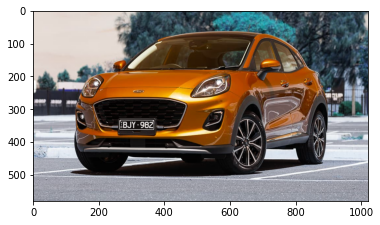

In [ ]:
#1. reading the image
image = cv2.imread('/content/image1.jpg')
#displaying the image
plt.imshow(image)

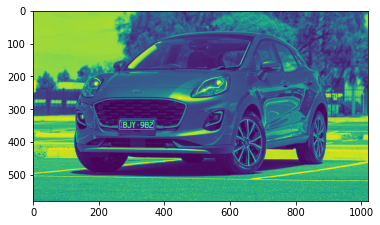

In [ ]:
#Converting given image from BGR to gray color model
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)


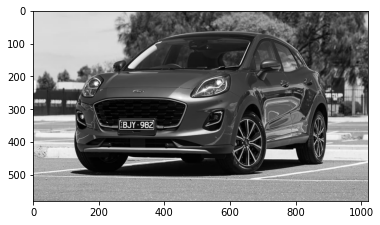

In [ ]:
#Converting above image which is in BGR color model format to RGB for better visualization 
RGB_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)

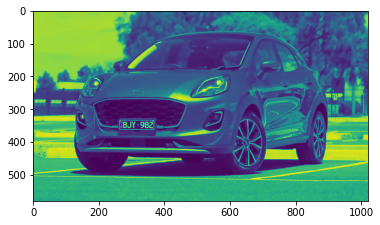

In [ ]:
#2. Filtering
#Using bilateral filter for smoothening the image and reducing noise, while preserving edges
bilateral_filter = cv2.bilateralFilter(gray_image, 11, 17, 17) 
plt.imshow(bilateral_filter)

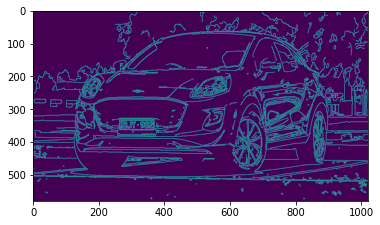

In [ ]:
#3. Edge detection
#Using canny edge detection to detect the edges
edge = cv2.Canny(bilateral_filter, 30, 200) #Edge detection (a2c rb3)
plt.imshow(edge)

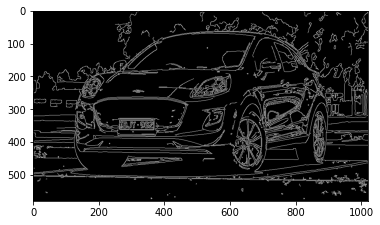

In [ ]:
#Converting above image to RGB color model for better visualization
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)) 

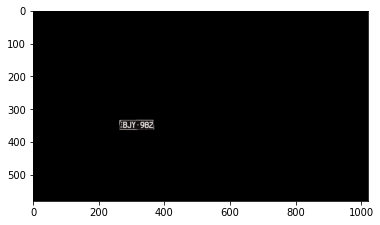

In [ ]:
#4. Contour search
#Here we will detect contours and apply a mask
#findContours used to detect the shape in tree form and also in approximation type
contours1 = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
#we grab the returned contours and hierarchy  
contours = imutils.grab_contours(contours1) 
#sorting contours by specifying area and in reverse order and it will return top 10 contours 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


#here we are selecting the polygon which has 4 sides
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break


#created a temp mask of size of image with 1 byte data per pixel with all 0's(black image)
mask = np.zeros(gray_image.shape, np.uint8)
# location with display parameter is applied on temp mask and creating the new mask
new_image = cv2.drawContours(mask, [location], 0,255, -1)
#here the new mask is overidden on the new image
new_image = cv2.bitwise_and(image,image, mask=mask)


plt.imshow(new_image)

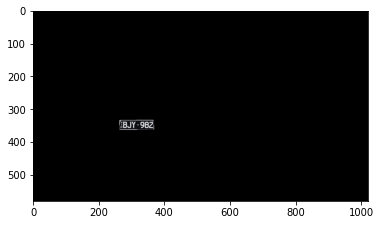

In [ ]:
#Converting to RGB for better visualization
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

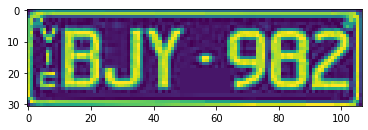

In [ ]:
#5/6. Detecting and storing the location of the plate
#Here we are storing co-ordinates of new_image
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop_image = gray_image[x1:x2+1, y1:y2+1]

plt.imshow(crop_image)

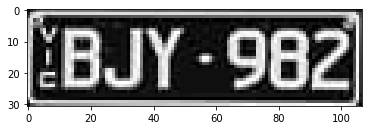

In [ ]:
#Converting to RGB for better visualization
plt.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))

In [ ]:
#7. Extraction of text
#reader will read the text in english language
reader = easyocr.Reader(['en'])
#resultOfImage will store the text of conversion of image
resultOfImage = reader.readtext(crop_image)
resultOfImage

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 2], [107, 2], [107, 31], [0, 31]], 'EBJY. 982]', 0.3741937983327902)]

In [ ]:
text = resultOfImage[0][-2]
text

'EBJY. 982]'

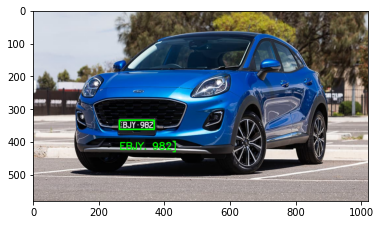

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
#8. Output
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))